# Câu Hỏi, Đáp Án và Phân Tích
The Movies Dataset

---

## 0. Môi trường và Dữ Liệu


Tất cả các thư viện môi trường dùng trong đồ án này được liệt kê trong file `environment.yml`.

Trước khi tiến hành phân tích dữ liệu, chúng ta sẽ import các thư viện sau.

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast

import warnings
warnings.filterwarnings('ignore')

Với dữ liệu sau khi khám phá và xử lý sơ bộ, chúng ta sẽ sử dụng chúng để phân tích và trả lời câu hỏi. Ta vẫn lưu chúng vào DataFrame là `movies`.

In [119]:
movies = pd.read_csv('Data/movies_cleaned.csv')
movies.head(5)

,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"Animation,Comedy,Family",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30 00:00:00,373554033,81.0,English,Released,UNKNOWN,Toy Story,False,7.7,5415
1,False,UNKNOWN,65000000,"Adventure,Fantasy,Family",en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures,Teitler Film,Interscope Commu...",United States of America,1995-12-15 00:00:00,262797249,104.0,"English,Français",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,Grumpy Old Men Collection,0,"Romance,Comedy",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros.,Lancaster Gate",United States of America,1995-12-22 00:00:00,0,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,UNKNOWN,16000000,"Comedy,Drama,Romance",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22 00:00:00,81452156,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,Father of the Bride Collection,0,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions,Touchstone Pictures",United States of America,1995-02-10 00:00:00,76578911,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173


### Câu hỏi 1: Các thể loại phim phản ánh điều gì về thị hiếu khán giả và xu hướng trong ngành công nghiệp điện ảnh?

Để phân tích cho câu hỏi trên, ta sẽ tập trung vào hai khía cạnh chính nhằm hiểu rõ hơn về sự phân bố và xu hướng của các thể loại trong ngành công nghiệp điện ảnh.

1. **Khám phá sự phân bố của số lượng phim theo thể loại:**  
   Trước tiên, chúng ta sẽ trả lời câu hỏi: **"Có bao nhiêu phim thuộc từng thể loại, và thể loại nào phổ biến nhất?"**.  
   
   Kết quả phân tích này sẽ giúp ta:  
   - Cung cấp cái nhìn tổng quan về mức độ phổ biến của các dòng phim.  
   - Hỗ trợ nhà sản xuất trong việc nhận diện thị hiếu khán giả để định hướng chiến lược đầu tư.  
   - Giúp người xem biết được các thể loại chiếm ưu thế để dễ dàng lựa chọn dòng phim yêu thích.

2. **Xu hướng của 5 thể loại phổ biến nhất qua các năm:**  
   Tiếp theo, chúng ta sẽ đi sâu phân tích xu hướng phát hành phim của **5 thể loại phổ biến nhất** qua các năm thông qua câu hỏi: **"Trong số các thể loại phổ biến nhất, thể loại nào đang phát triển mạnh mẽ, và thể loại nào có dấu hiệu suy giảm hay không"**?  
   
   Kết quả mong đợi:  
   - Nhận diện được sự tăng trưởng hoặc giảm sút của các thể loại phim thịnh hành qua từng thời kỳ.  
   - Hỗ trợ nhà sản xuất dự đoán các dòng phim tiềm năng để đầu tư.  

Hai khía cạnh trên không chỉ giúp hiểu rõ về **sự phổ biến** và **xu hướng thay đổi** của các thể loại phim, mà còn cung cấp thông tin giá trị cho nhà sản xuất trong việc đáp ứng thị hiếu khán giả và định hướng đầu tư hiệu quả, đồng thời giúp người xem khám phá những dòng phim đáng chú ý theo từng thời kỳ.

#### 1.1 Đầu tiên, chúng ta sẽ trả lời câu hỏi: **"Có bao nhiêu phim thuộc từng thể loại, và thể loại nào phổ biến nhất?"**.  


In [120]:
question01_df = movies.copy()
question01_df['genres'] = question01_df['genres'].apply(lambda x: x.split(','))
question01_df = question01_df.explode('genres')

# đếm số lượng phim theo thể loại
genre_counts = question01_df['genres'].value_counts()
genre_counts

genres
Drama              20199
Comedy             13091
Thriller            7611
Romance             6721
Action              6584
Horror              4670
Crime               4297
Documentary         3919
Adventure           3488
Science Fiction     3037
Family              2759
Mystery             2463
UNKNOWN             2364
Fantasy             2300
Animation           1929
Foreign             1620
Music               1597
History             1395
War                 1320
Western             1042
TV Movie             757
Name: count, dtype: int64

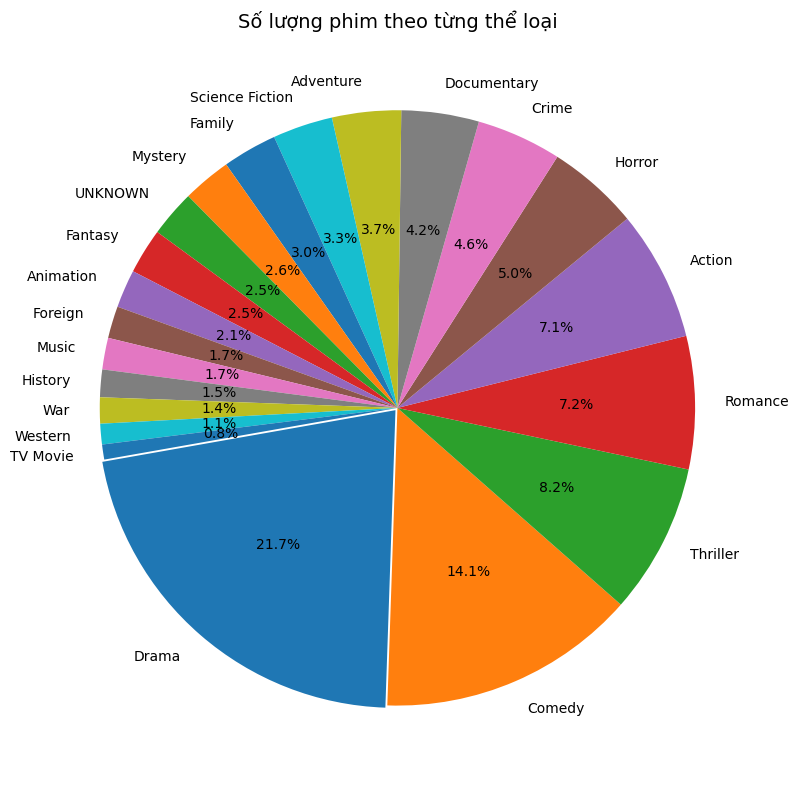

In [121]:
# Plot the pie chart
plt.figure(figsize=(10, 8))
explode = [0.01 if count == genre_counts.max() else 0 for count in genre_counts]
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=190, explode=explode, textprops={'fontsize': 10})
plt.title('Số lượng phim theo từng thể loại', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

Như vậy từ biểu đồ trên, ta có thể thấy thể loại phim phổ biến nhất là **Drama** chiếm tỷ lệ lớn nhất, tiếp theo là **Comedy** và **Thriller**. Các thể loại như **Romance**, **Action**, và **Horror** cũng có số lượng phim đáng kể. Trong khi đó, các thể loại như **Western**, **TV Movie**, **History** và **War** có số lượng phim ít nhất.

#### 1.2 Tiếp theo, chúng ta sẽ tập trung phân tích xu hướng phát hành phim theo thời gian của **5 thể loại phổ biến nhất**. Cụ thể, ta sẽ xem xét sự thay đổi về số lượng phim được phát hành của các thể loại này qua từng năm

Để thực hiện phân tích xu hướng phát hành phim theo thời gian của 5 thể loại phổ biến nhất, ta sẽ thực hiện các bước sau:

1. **Lọc dữ liệu cho 5 thể loại phổ biến nhất:**  
    Chúng ta sẽ chọn ra 5 thể loại có số lượng phim nhiều nhất từ `genre_counts`.

2. **Tạo DataFrame chứa dữ liệu của 5 thể loại này:**  
    Lọc dữ liệu từ `question01_df` để chỉ chứa các phim thuộc 5 thể loại phổ biến nhất.

3. **Tính toán số lượng phim phát hành theo từng năm cho mỗi thể loại:**  
    Sử dụng cột `release_date` để tính toán số lượng phim phát hành theo từng năm cho mỗi thể loại.

4. **Vẽ biểu đồ xu hướng phát hành phim theo thời gian:**  
    Sử dụng biểu đồ đường để hiển thị xu hướng phát hành phim của 5 thể loại phổ biến nhất qua các năm.

In [122]:
top_5_genres = genre_counts.head(5).index.tolist()
top_5_genres_df = question01_df[question01_df['genres'].isin(top_5_genres)]

# chuyển đổi cột release_date sang kiểu datetime, bỏ qua các giá trị "UNKOWN"
top_5_genres_df['release_date'] = pd.to_datetime(top_5_genres_df['release_date'],  errors='coerce')
top_5_genres_df['year'] = top_5_genres_df['release_date'].dt.year

# Tính toán số lượng phim phát hành theo từng năm cho mỗi thể loại
genre_year_counts = top_5_genres_df.groupby(['year', 'genres']).size().unstack().fillna(0)

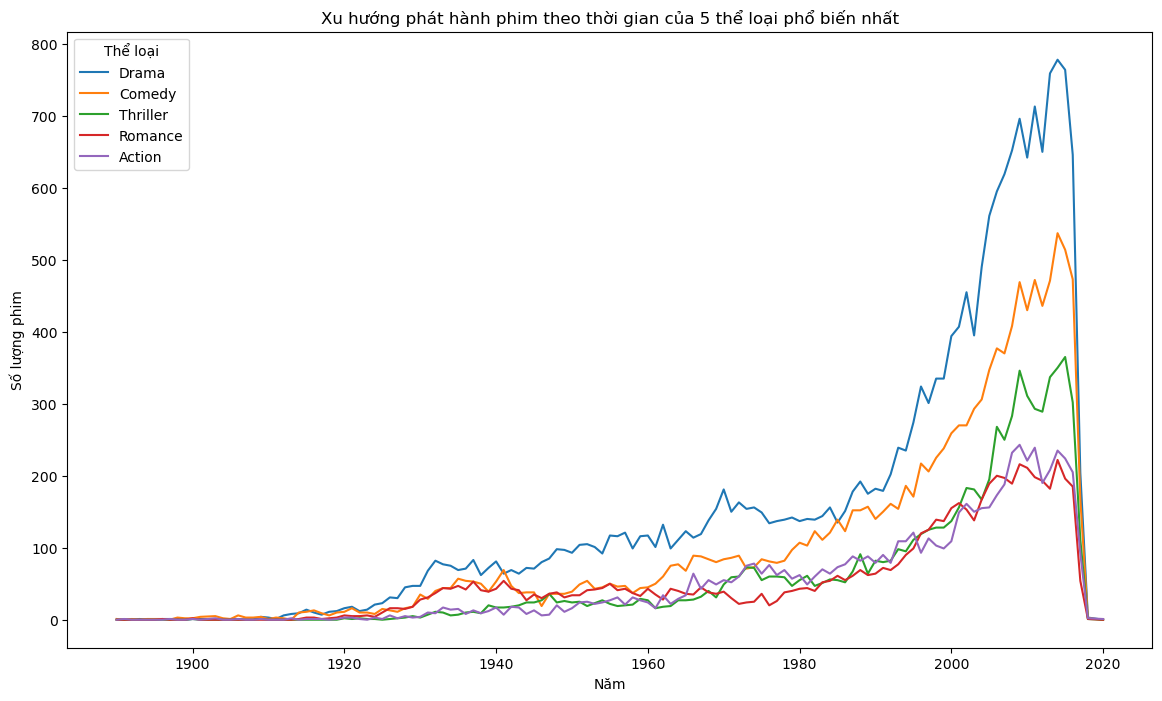

In [123]:
# Vẽ biểu đồ xu hướng phát hành phim theo thời gian
plt.figure(figsize=(14, 8))
for genre in top_5_genres:
    plt.plot(genre_year_counts.index, genre_year_counts[genre], label=genre)

plt.title('Xu hướng phát hành phim theo thời gian của 5 thể loại phổ biến nhất')
plt.xlabel('Năm')
plt.ylabel('Số lượng phim')
plt.legend(title='Thể loại')
plt.show()

Như vậy từ các quan sát từ các biểu đồ trên, chúng ta có thể rút ra một số nhận xét sau:
- **Drama** là thể loại phim phổ biến nhất, chiếm tỷ lệ lớn nhất trong tổng số phim, **Comedy** và **Thriller** là hai thể loại phổ biến tiếp theo, với số lượng phim đáng kể.
- Các thể loại như **Romance**, **Action**, và **Horror** cũng có số lượng phim tương đối nhiều.
- Ngược lại các thể loại như **Western**, **TV Movie**, **History**, và **War** có số lượng phim ít nhất, thể hiện đây là những thể loại không phổ biến, không được ưa chuộng bởi phần lớn khán giả và nhà sản xuất.
- Thể loại phim **Drama** luôn duy trì vị trí dẫn đầu về số lượng phim phát hành qua các năm thể hiện rõ đây luôn là thể loại phim "ăn khách" và thu hút đông đảo khán giả nhất.
- **Comedy** duy trì xu hướng phát hành ổn định và ghi nhận sự tăng trưởng đều đặn qua các năm, thể hiện sự yêu thích lâu dài của khán giả đối với thể loại mang tính giải trí cao này.
- **Thriller** nổi bật với tốc độ phát triển nhanh chóng, đặc biệt từ sau năm 2000, khi dòng phim này vượt qua **Romance** và **Action** về số lượng sản xuất, cho thấy sự thay đổi rõ rệt trong thị hiếu khán giả đối với những câu chuyện kịch tính, lôi cuốn.  
- **Romance** và **Action** dù trải qua nhiều biến động vẫn giữ được vị thế quan trọng với lượng phim phát hành đáng kể. Tuy nhiên, **Romance** đang có xu hướng suy giảm sức hút, đặc biệt khi so sánh với giai đoạn 1930-1940, thời điểm mà thể loại này từng chiếm ưu thế vượt trội nhưng hiện tại không còn giữ được vị trí như trước. 
- Nhìn chung các thể loại phim đều có xu hướng tăng trưởng qua các năm, đặc biệt là từ năm 2000 trở về sau với sự bùng nổ của số lượng phim cho thấy sự phát triển nhanh chóng của ngành công nghiệp điện ảnh.

Từ đó, chúng ta có thể rút ra được một số thông tin hữu ích cho các đối tượng sau:
- **Nhà sản xuất:**
    - Nên tập trung đầu tư vào các thể loại phim phổ biến như **Drama**, **Comedy**, và **Thriller** để đáp ứng nhu cầu thị trường.
    - Có thể xem xét đầu tư vào các thể loại như **Romance** và **Action** do vẫn có lượng khán giả nhất định và tiềm năng phát triển.
    - Các thể loại ít phổ biến như **Western**, **TV Movie**, **History**, và **War** có thể không phải là lựa chọn ưu tiên nếu mục tiêu là tối ưu hóa lợi nhuận.
- **Người xem:**
    - Có thể dễ dàng tìm thấy các bộ phim thuộc thể loại **Drama**, **Comedy**, và **Thriller** do sự phổ biến và số lượng lớn.
    - Nếu yêu thích các thể loại như **Romance** và **Action**, người xem vẫn có nhiều lựa chọn nhưng có thể ít hơn so với các thể loại phổ biến nhất.
    - Các thể loại ít phổ biến như **Western**, **TV Movie**, **History**, và **War** có thể khó tìm hơn nhưng vẫn có những bộ phim chất lượng đáng xem

### Câu hỏi 2: Thị trường phim theo ngôn ngữ (spoken languages) hiện đang như nào, liệu phim có nhiều ngôn ngữ có xu hướng phổ biến hơn hoặc đạt doanh thu cao hơn không?
Để trả lời câu hỏi này, chúng ta sẽ phân tích hai phần nhỏ, nhằm hiểu rõ sự đa dạng ngôn ngữ trong ngành điện ảnh, cũng như đánh giá ảnh hưởng của việc sử dụng đa ngôn ngữ đối với độ phổ biến và doanh thu của phim.

1. **Phân bố phim theo ngôn ngữ**  
Trước tiên, chúng ta sẽ khám phá sự phân bố của các phim theo ngôn ngữ, giúp hiểu rõ về mức độ đa dạng ngôn ngữ trong ngành điện ảnh thông qua câu hỏi :**Phim sử dụng ngôn ngữ nào là phổ biến nhất?**  và  **Số lượng phim đa ngôn ngữ (sử dụng nhiều hơn 1 ngôn ngữ) so với phim đơn ngôn ngữ ra sao?**
- Hiểu được các phân tích này sẽ giúp ta:
    - Nhận diện sự thống trị của một số ngôn ngữ (chẳng hạn như tiếng Anh) trong ngành điện ảnh.
    - Đồng thời cũng giúp ta có thể xác định sự hiện diện của các phim đa ngôn ngữ và đánh giá mức độ tiếp cận toàn cầu của chúng.

2. **Phim đa ngôn ngữ và doanh thu, độ phổ biến**  
Tiếp theo, chúng ta sẽ phân tích ảnh hưởng của việc sử dụng nhiều ngôn ngữ đối với độ phổ biến và doanh thu của phim qua câu hỏi: **Doanh thu trung bình và độ phổ biến của phim đa ngôn ngữ so với phim đơn ngôn ngữ?**  

- Phân tích này sẽ cung cấp cái nhìn sâu sắc về tầm quan trọng của việc sử dụng nhiều ngôn ngữ trong việc tăng khả năng tiếp cận toàn cầu của phim. Đồng thời, chúng ta sẽ kiểm tra liệu việc sử dụng tiếng Anh có thực sự mang lại lợi thế về doanh thu và độ phổ biến hay không.

Các phân tích trên sẽ giúp trả lời câu hỏi chính về việc liệu phim có nhiều ngôn ngữ có xu hướng phổ biến hơn hoặc đạt doanh thu cao hơn hay không. Chúng cũng cung cấp những thông tin giá trị về cách nhà sản xuất có thể mở rộng khả năng tiếp cận của phim và chiến lược đầu tư vào các bộ phim đa ngôn ngữ, từ đó tối ưu hóa lợi nhuận và phục vụ nhu cầu đa dạng của khán giả toàn cầu.

#### 2.1 Đầu tiên, để hiểu rõ mức độ đa dạng ngôn ngữ trong ngành điện ảnh ta sẽ khám phá phân bố số lượng phim theo ngôn ngữ


In [124]:
# Tách các ngôn ngữ trong cột 'spoken_languages' và tạo một DataFrame mới
question02_df = movies.copy()
question02_df['spoken_languages'] = question02_df['spoken_languages'].apply(lambda x: x.split(','))
languages_df = question02_df.explode('spoken_languages')


languages_df


# # Đếm số lượng phim theo ngôn ngữ
# language_counts = languages_df['spoken_languages'].value_counts()
# print(language_counts)

# # Đếm số lượng phim đơn ngôn ngữ và đa ngôn ngữ
# movies['num_languages'] = movies['spoken_languages'].apply(len)
# single_language_count = (movies['num_languages'] == 1).sum()
# multi_language_count = (movies['num_languages'] > 1).sum()

# print(f"Số lượng phim đơn ngôn ngữ: {single_language_count}")
# print(f"Số lượng phim đa ngôn ngữ: {multi_language_count}")

# # Vẽ biểu đồ phân bố số lượng phim theo ngôn ngữ
# plt.figure(figsize=(12, 8))
# language_counts.plot(kind='bar')
# plt.title('Số lượng phim theo ngôn ngữ')
# plt.xlabel('Ngôn ngữ')
# plt.ylabel('Số lượng phim')
# plt.xticks(rotation=90)
# plt.show()

,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,Toy Story Collection,30000000,"Animation,Comedy,Family",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30 00:00:00,373554033,81.0,English,Released,UNKNOWN,Toy Story,False,7.7,5415
1,False,UNKNOWN,65000000,"Adventure,Fantasy,Family",en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures,Teitler Film,Interscope Commu...",United States of America,1995-12-15 00:00:00,262797249,104.0,English,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
1,False,UNKNOWN,65000000,"Adventure,Fantasy,Family",en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures,Teitler Film,Interscope Commu...",United States of America,1995-12-15 00:00:00,262797249,104.0,Français,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,Grumpy Old Men Collection,0,"Romance,Comedy",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros.,Lancaster Gate",United States of America,1995-12-22 00:00:00,0,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,UNKNOWN,16000000,"Comedy,Drama,Romance",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22 00:00:00,81452156,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45184,False,UNKNOWN,0,"Drama,Family",fa,رگ خواب,Rising and falling between a man and woman.,0.072051,UNKNOWN,Iran,UNKNOWN,0,90.0,فارسی,Released,Rising and falling between a man and woman,Subdue,False,4.0,1
45185,False,UNKNOWN,0,Drama,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,Sine Olivia,Philippines,2011-11-17 00:00:00,0,360.0,UNKNOWN,Released,UNKNOWN,Century of Birthing,False,9.0,3
45186,False,UNKNOWN,0,"Action,Drama,Thriller",en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,American World Pictures,United States of America,2003-08-01 00:00:00,0,90.0,English,Released,A deadly game of wits.,Betrayal,False,3.8,6
45187,False,UNKNOWN,0,UNKNOWN,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,Yermoliev,Russia,1917-10-21 00:00:00,0,87.0,UNKNOWN,Released,UNKNOWN,Satan Triumphant,False,0.0,0
